## Genes cluster with PCA+tSNE and mark genes
similarity as Supplementary Fig5 of Rep10

In [1]:
import sys


from scGCO import *


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2,venn3
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
j=9
result_df=read_result_to_dataframe(
    '../../../results/MouseOB/scGCO_results/Rep'+str(j)+'_result_df.csv')
gco_df = result_df[result_df.fdr<0.05]
gco_df.shape

(187, 244)

In [4]:
de_df=pd.read_csv('../../../results/MouseOB/SpatialDE_results/MOB_'+str(j)+'_DE.csv')
de_df.shape

(142, 20)

In [5]:
spark = pd.read_csv('../../../results/MouseOB/SPARK_results/Rep'+str(j)+'_MOB_spark.csv')
spark.shape

(472, 3)

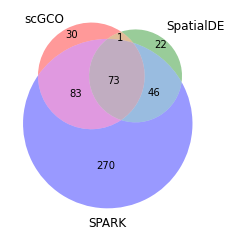

In [6]:
v=venn3(subsets=(set(gco_df.index),set(de_df.g.values),set(spark.genes)),set_labels=['scGCO','SpatialDE','SPARK'])
## set labels names
lal=v.get_label_by_id('B')
x_,y_=lal.get_position()
lal.set_position((x_+0.05,y_))
plt.savefig('../../../results/Figure/Supple_Fig4a.pdf')

### Supple Fig 4a

In [7]:
j=9
tsne_proj_df = pd.read_csv('../../../Temp_files/Rep{}_scGCO_tsne_proj_df.csv'.format(j),index_col=0)
tsne_proj_df.shape

(187, 3)

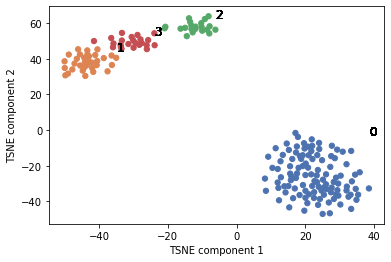

110
33
21
23


In [8]:
plot_tsne(tsne_proj_df.iloc[:,0:2].values,tsne_proj_df.iloc[:,2] ) #,
#           fileName='../../PDF_file/supple_figure/Fig2b.pdf')
for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    cluster_df = gco_df.loc[geneList].sort_values('fdr')
    print(len(geneList))

### Supple_Fig 4b

In [9]:
tsne_proj_df.iloc[:3,]

tsne1      tsne2  cluster
Mmd2   -36.408306  41.828080        1
Fkbp1a  27.149012 -46.692234        0
Ctxn1   32.016003 -33.891758        0

In [10]:
data_norm = pd.read_csv('../../../Temp_files/data_norm_new/Rep9_data_norm_new.csv',
                        index_col=0)
locs = Get_coord(data_norm)

exp= data_norm.iloc[:,0].values
cellGraph= create_graph_with_weight(locs, exp)

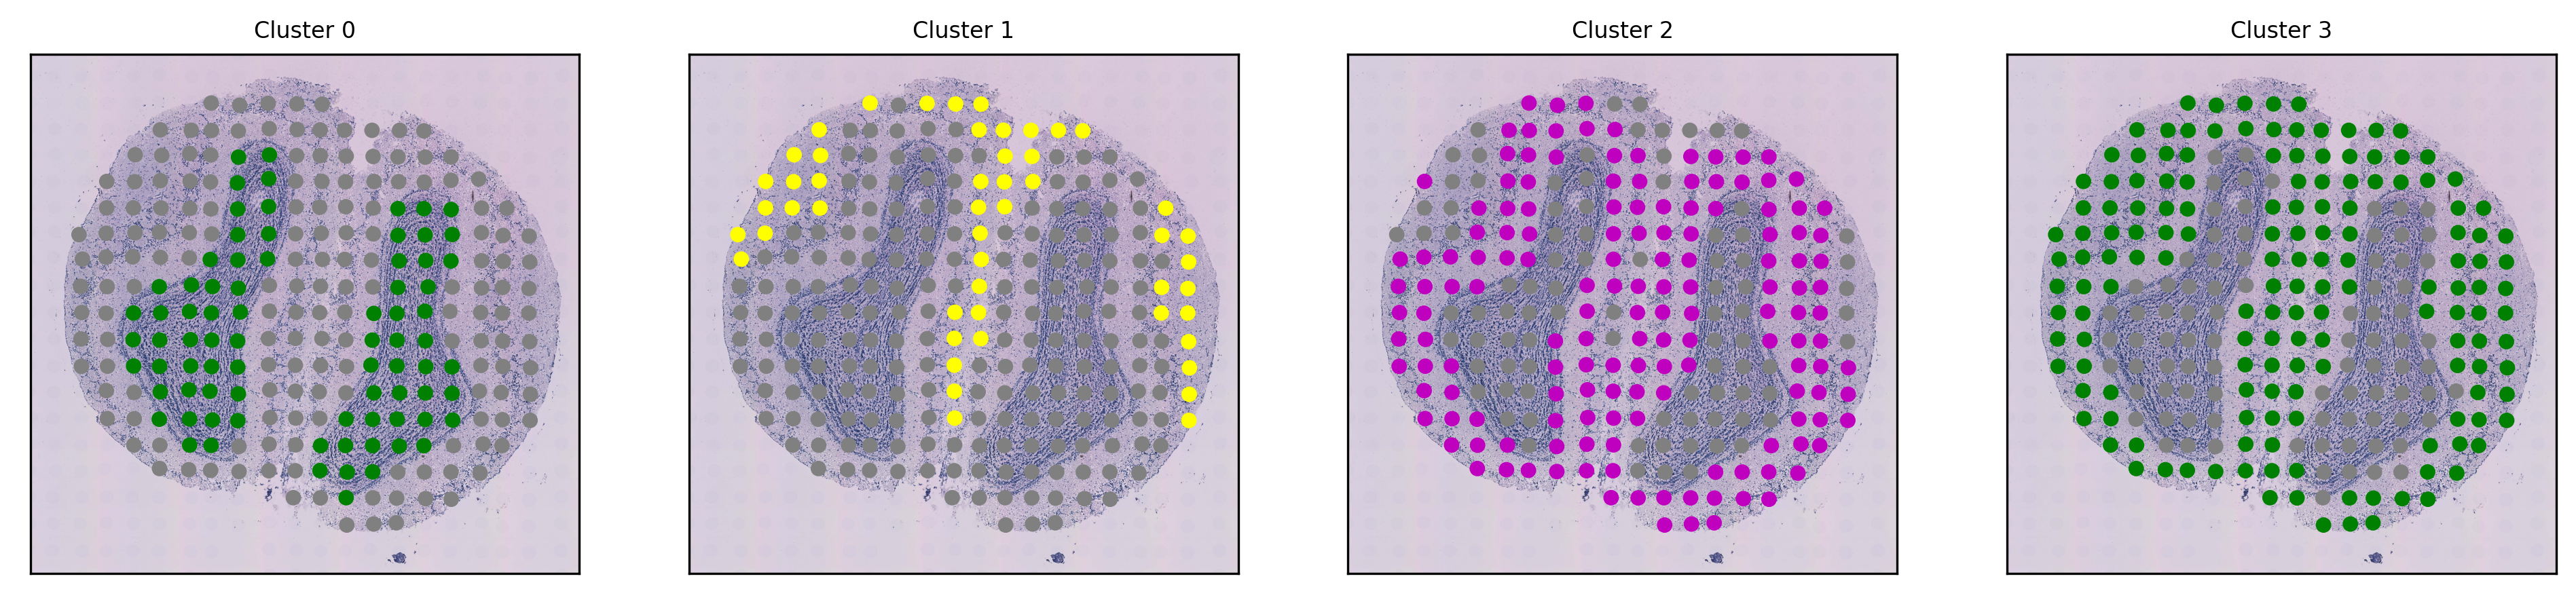

In [11]:
ncols=4
fig,ax=plt.subplots(1,ncols,figsize=(ncols*4,1*4),dpi=300)

for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    KMlables,hmrf_labels=create_labels(locs,data_norm,geneList,cellGraph,
                                       cluster_size=2,unary_scale_factor=100,smooth_factor=20)
    if ck==0:              
        colors=['grey',"green"] 
    if ck==1:              
        colors=["yellow","grey"] 
    if ck==2:               
        colors=["grey","m"]
    if ck==3:                
        colors=["grey","green"] 
        
    image='../../../data/Raw_data/HE-MOB-breast_cancer//HE_Rep'+str(j)+'_MOB.jpg'
    axes=ax[ck]
    title='Cluster {}'.format(ck)
    subplot_HE_with_labels(locs,hmrf_labels,image,axes,colors,title,s=20)
    axes.set_xticks([],[])
    axes.set_yticks([],[])

plt.show()    

In [12]:
fig.savefig('../../../results/Supple_Fig4b.pdf')

## Supple_Fig. 4c-f

In [13]:
cluster0=['Pcp4','Nrgn','Map2k1','Penk','Mapk1','Ube2ql1']
cluster1=['Mcf2l','Kif5b','Kctd12','Bgn','Fabp7','Omp']
cluster2 = ['2900097C17Rik','Cdhr1','Cck','Doc2g','Slc17a7','Sncb']
cluster3=['Glul','Sepp1','Apoe','Sparcl1','Aldoc','Kcnj10']

In [14]:
for ck,tsne_df in tsne_proj_df.groupby('cluster'):
    geneList=tsne_df.index.values
    cluster_df = gco_df.loc[geneList].sort_values('fdr')
    [print(genes) if genes not in geneList else 'in' for genes in eval('cluster'+str(ck))] 
    print(len(geneList))
    
#     multipage_pdf_visualize_spatial_genes(cluster_df,locs, data_norm, cellGraph,
#     fileName=))

110
33
21
23


Pcp4 9.742949900662922e-05
Nrgn 0.00012354181380760734
Map2k1 0.00014514020415839224
Penk 0.00039370367602598445
Mapk1 0.00040809635097260687
Ube2ql1 0.02146080758042751


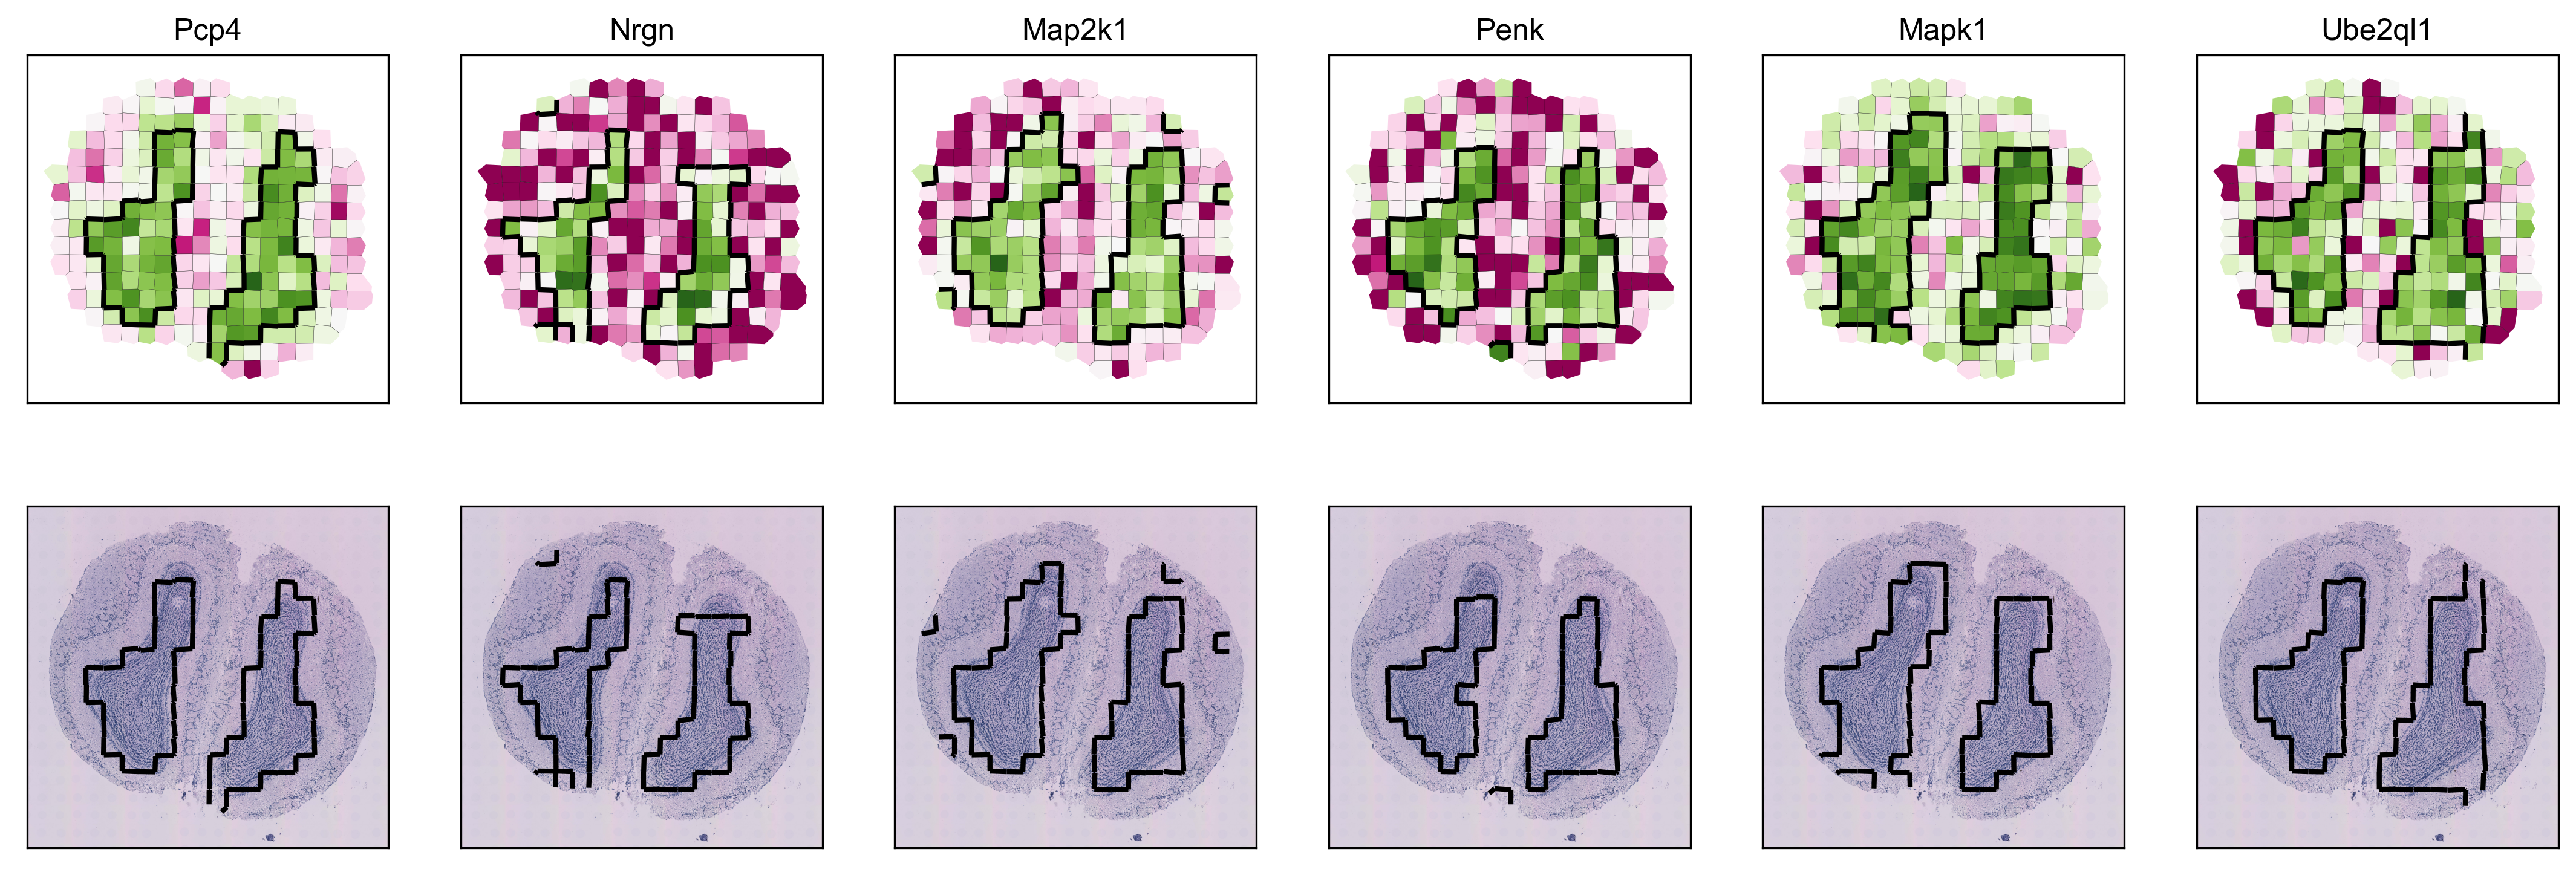

In [15]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster0):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][4:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID,p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.1, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#plt.tight_layout()
plt.show()    

In [17]:
fig.savefig('../../../results/Figure//Supple_Fig4c.pdf')

Mcf2l 8.114583447357306e-06
Kif5b 2.125422933130928e-05
Kctd12 9.742949900662922e-05
Bgn 0.0001309464234373697
Fabp7 0.00014514020415839224
Omp 0.0031810597191369145


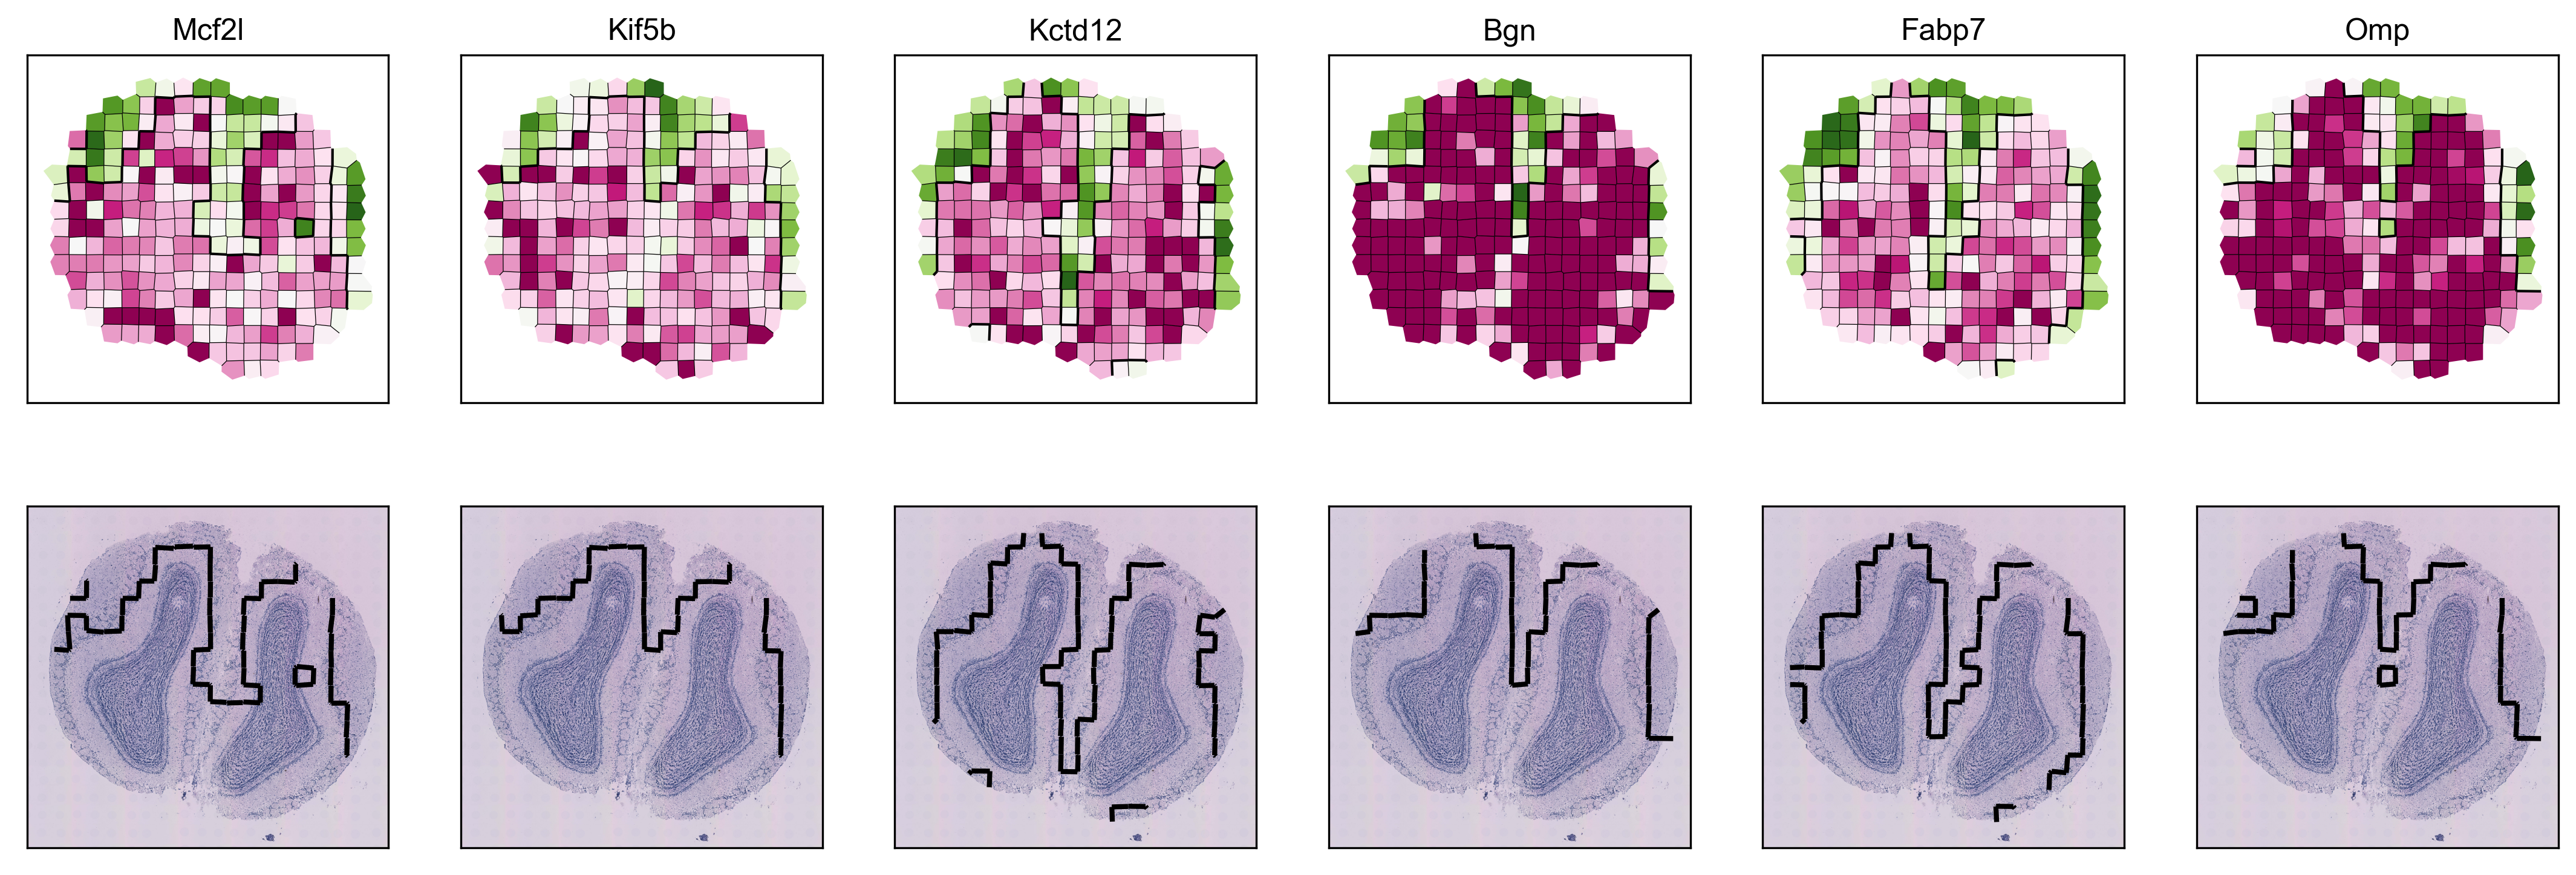

In [19]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster1):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][4:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID,p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=1,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#plt.tight_layout()
plt.show()

#     

In [20]:
fig.savefig('../../../results/Figure//Supple_Fig4d.pdf')

2900097C17Rik 0.00014712533004279448
Cdhr1 0.0015727902543582483
Cck 0.001776092921424366
Doc2g 0.002177355386262428
Slc17a7 0.0025369850513975874
Sncb 0.007296709016505085


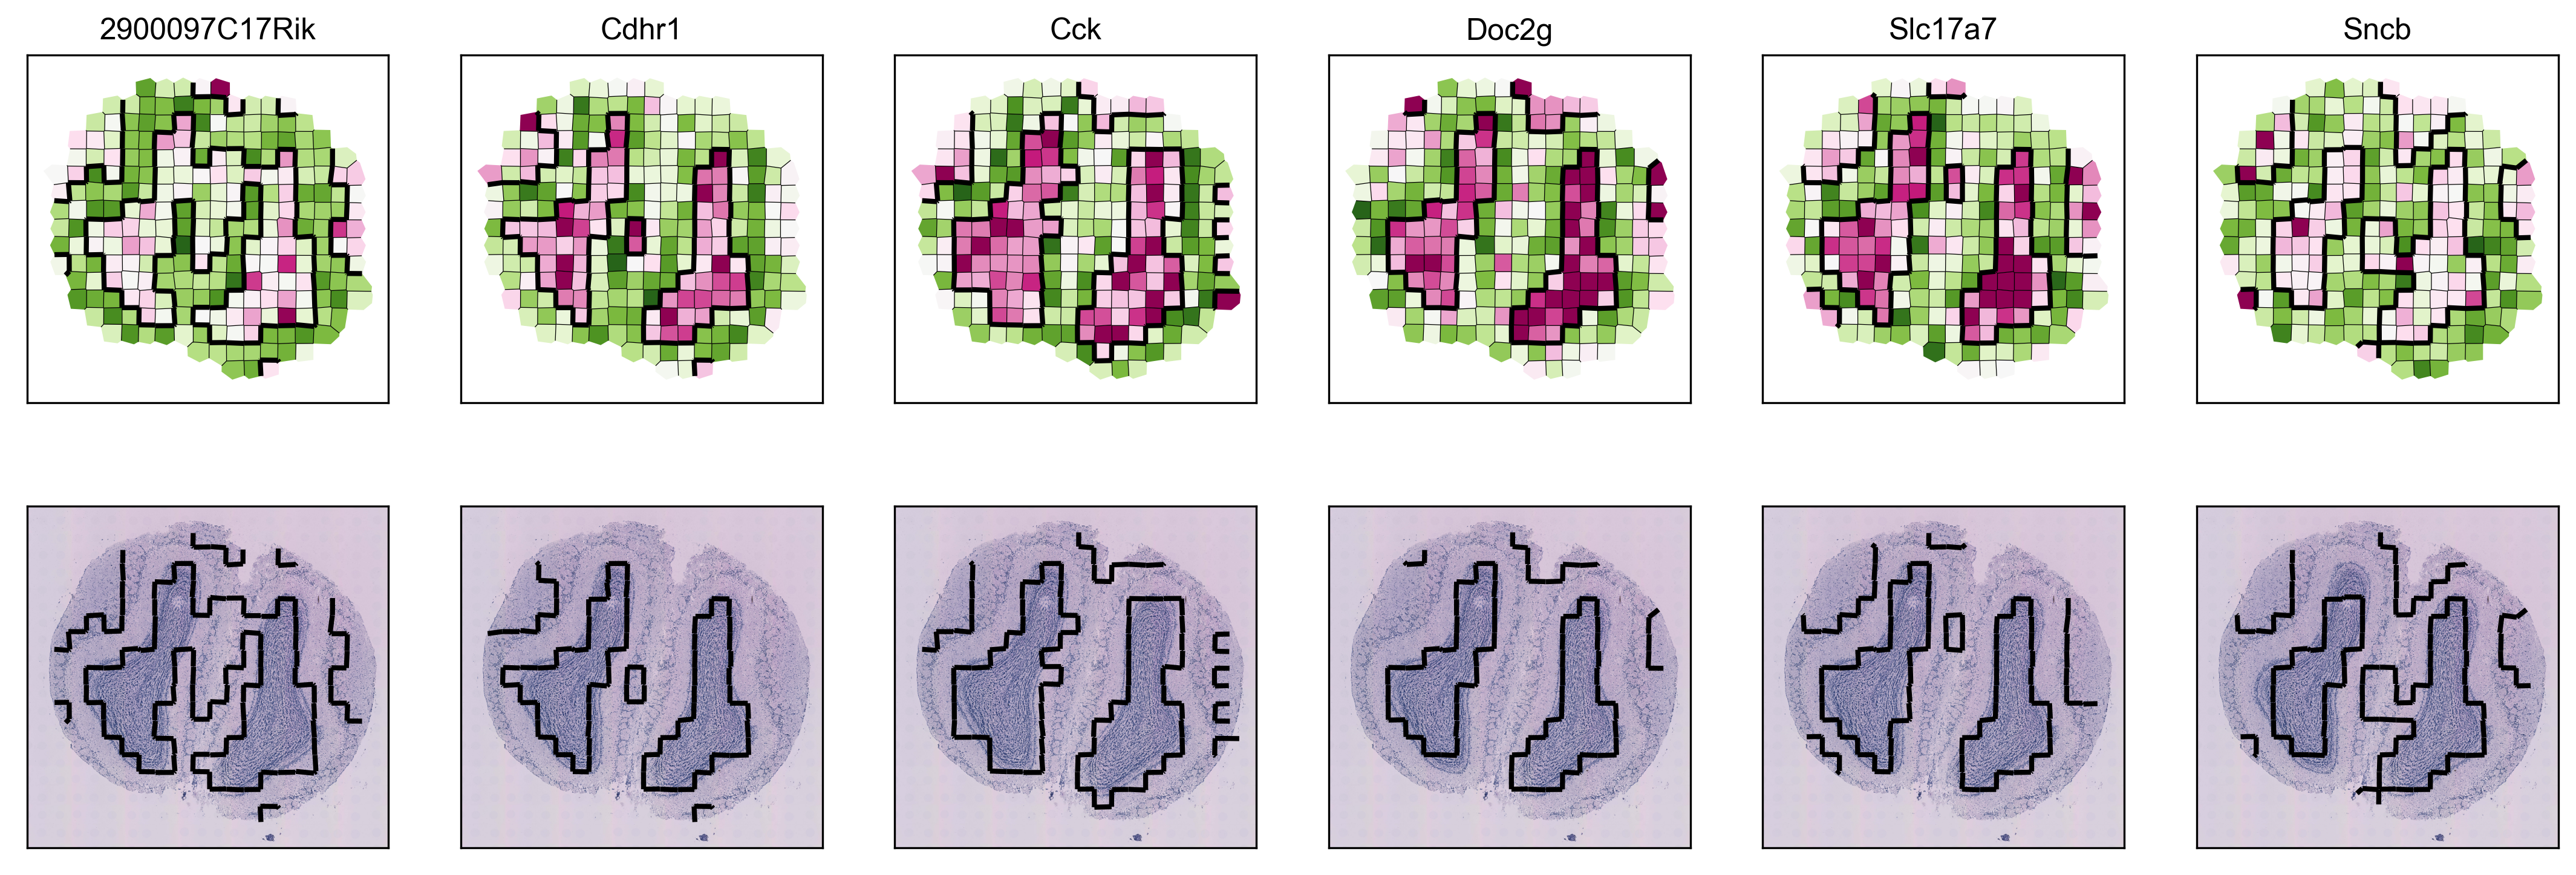

In [21]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster2):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][4:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID, p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#fig.tight_layout()

# plt.savefig('../figure/Fig2c')
plt.show()

#     

In [22]:
fig.savefig('../../../results/Figure//Supple_Fig4e.pdf')

Glul 9.742949900662922e-05
Sepp1 0.00010049236357947786
Apoe 0.00034429014609573065
Sparcl1 0.0007281663208567026
Aldoc 0.0025369850513975874
Kcnj10 0.00485521057601631


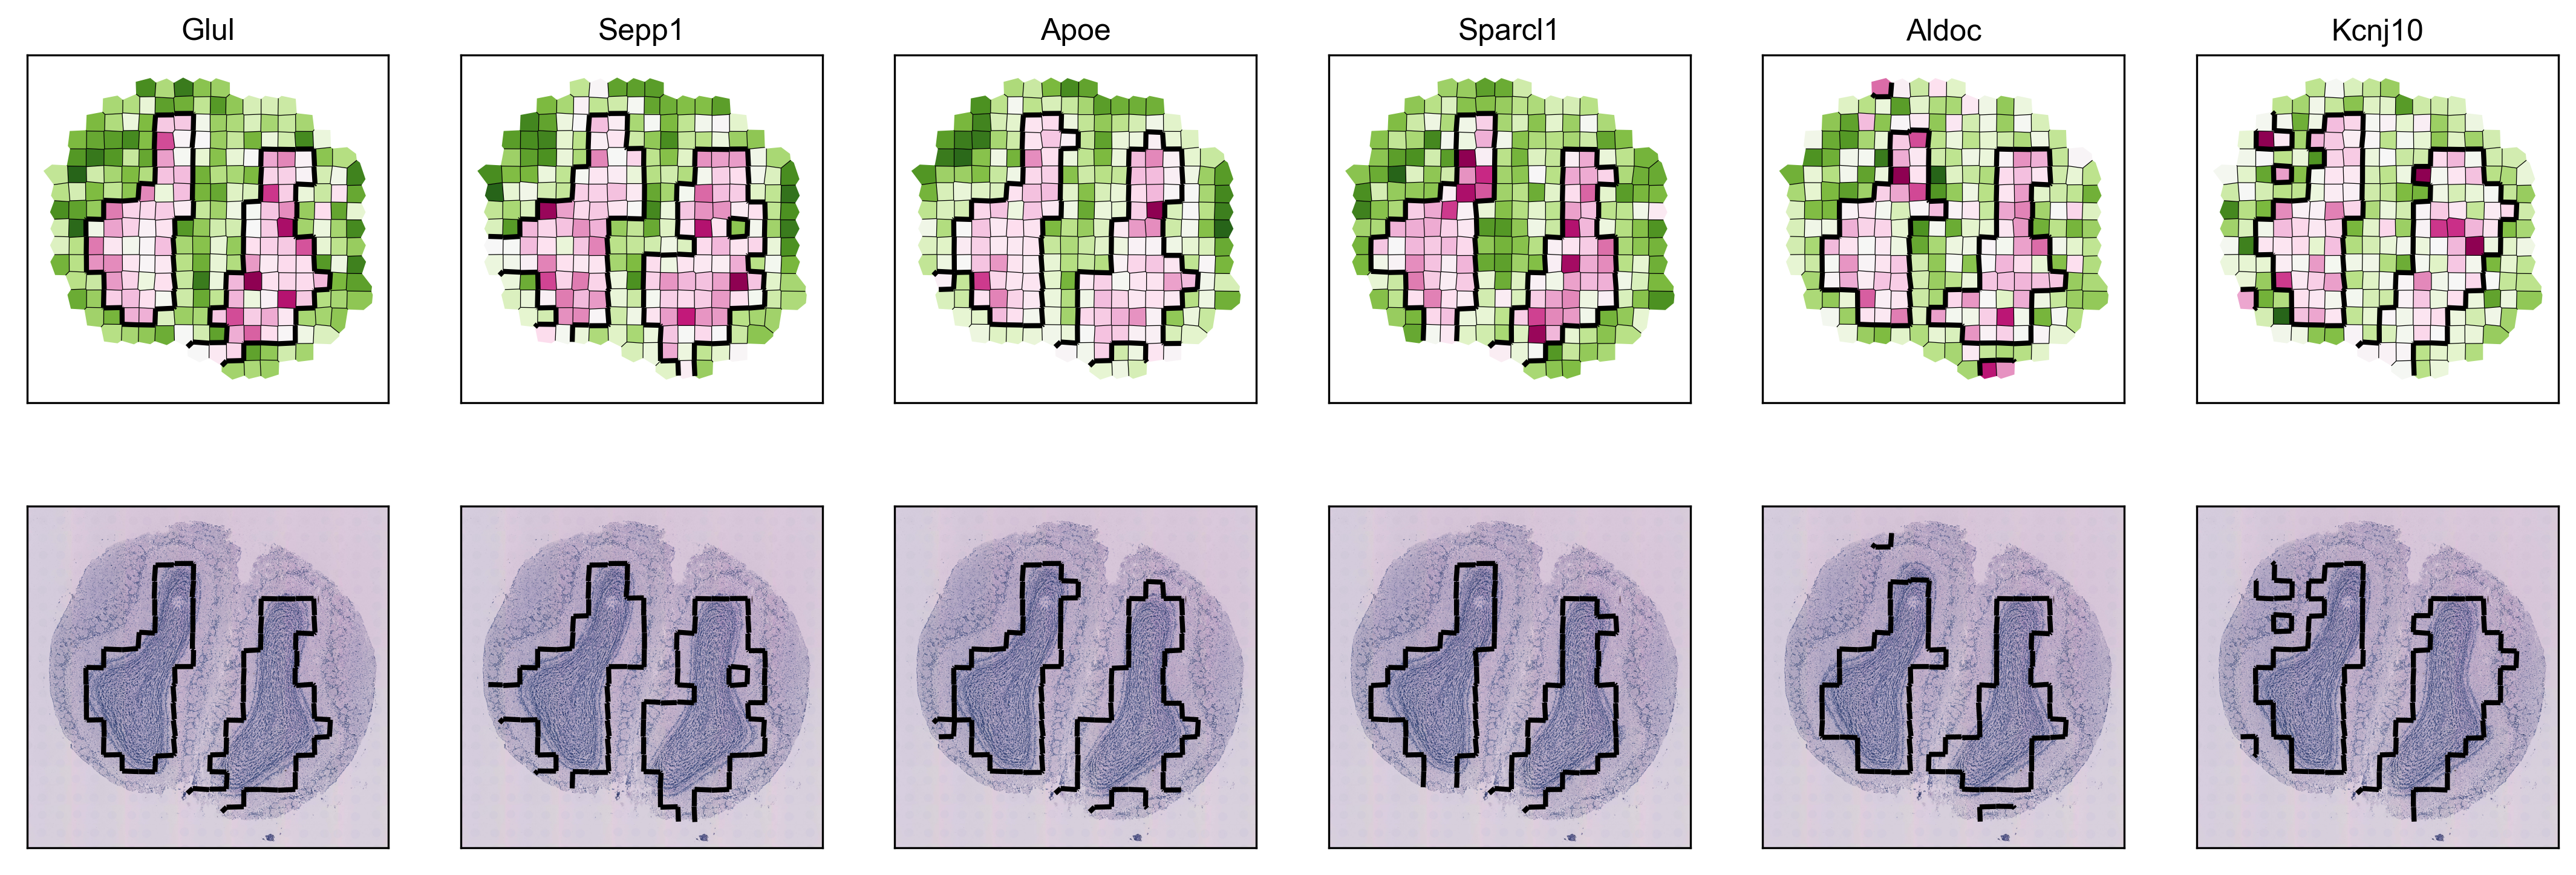

In [23]:
nrows=2
ncols=6
fig,ax=plt.subplots(nrows,ncols,dpi=300,
                    gridspec_kw={"height_ratios":[1,1.15]},
                    figsize=(ncols*3,nrows*3))

for i,geneID in enumerate(cluster3):
    exp=data_norm.loc[:,geneID]
    newLabels=gco_df.loc[geneID][4:].astype(int)
    p=gco_df.loc[geneID,'fdr']
    print(geneID, p)

    axes=ax[0,i]
    subplot_voronoi_boundary(geneID, coord=locs, count=exp, classLabel=newLabels, p=p,ax=axes ,
                             fdr=False, point_size=0,
                          line_colors="k", class_line_width=2,
                          line_width=0.3, line_alpha=1.0,fontsize=12,set_title=geneID)
    axes.set_xticks([],[])
    axes.set_yticks([],[])


    axes=ax[1,i]
    image=("../../../data/Raw_data/HE-MOB-breast_cancer/HE_Rep"+str(j)+"_MOB.jpg")
    add_HE_image(image,axes)
    subplot_boundary(geneID,locs,exp,newLabels,p,axes,
                     class_line_width=2,point_size=0,line_alpha=0,
                    set_title='')

    axes.set_xticks([],[])
    axes.set_yticks([],[])

#fig.tight_layout()

plt.show()

#     

In [24]:
fig.savefig('../../../results/Figure//Supple_Fig4f.pdf')